# L3: Multimodal Requests & Streaming

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
from anthropic import Anthropic

In [2]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
client = Anthropic()
MODEL_NAME="claude-3-5-sonnet-20241022"

## Content Blocks

In [4]:
messages = [
    {
        "role": "user",
        "content": "tell me a joke"
    }
]

response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

Here's a classic one:

Why don't scientists trust atoms?
Because they make up everything! 😄


<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [5]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "tell me a joke"},
        ]
    }
]

response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

Here's a classic:

Why don't scientists trust atoms?

Because they make up everything! 😄


In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "who"},
            {"type": "text", "text": "made"},
            {"type": "text", "text": "you?"},
        ]
    }
]
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

I am Claude, an AI assistant created by Anthropic. I aim to be direct and honest about this.


## Image Prompts

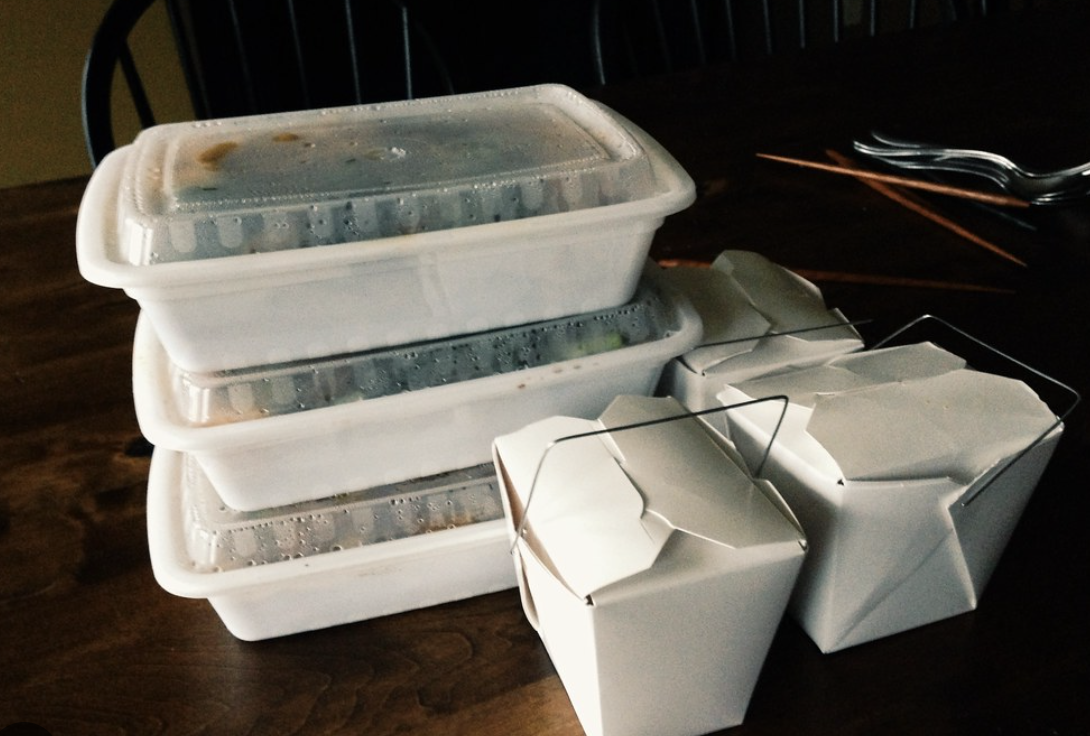

In [7]:
from IPython.display import Image
Image(filename='images/food.png') 

## Image Messages

In [8]:
import base64
# opens the image file in "read binary" mode
with open("images/food.png", "rb") as image_file:
    #reads the contents of the image as a bytes object
    binary_data = image_file.read() 
    #encodes the binary data using Base64 encoding
    base_64_encoded_data = base64.b64encode(binary_data) 
    #decodes base_64_encoded_data from bytes to a string
    base64_string = base_64_encoded_data.decode('utf-8')

In [9]:
base64_string[:100]

'iVBORw0KGgoAAAANSUhEUgAABEIAAALgCAYAAACQxtKmAAAMP2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSIbQAAlJCb4KA'

In [10]:
messages = [
    {
        "role": "user",
        "content": [{
            "type": "image",
            "source": {
                "type": "base64",
                "media_type": "image/png",
                "data": base64_string
            },
        },
        {
            "type": "text",
            "text": """How many to-go containers of each type 
            are in this image?"""
        }]
    }
]

In [11]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

In this image, there are:
- 3 clear-topped plastic rectangular containers (appears to be standard takeout containers with condensation visible on the lids)
- 3 white paper/cardboard folded takeout boxes (often called "Chinese takeout boxes" or "oyster pails")

So there are a total of 6 takeout containers, split evenly between two different styles.


## Image Block Helper Function

In [13]:
import base64
import mimetypes

def create_image_message(image_path):
    # Open the image file in "read binary" mode
    with open(image_path, "rb") as image_file:
        # Read the contents of the image as a bytes object
        binary_data = image_file.read()
    # Encode the binary data using Base64 encoding
    base64_encoded_data = base64.b64encode(binary_data)
    # Decode base64_encoded_data from bytes to a string
    base64_string = base64_encoded_data.decode('utf-8')
    # Get the MIME type of the image based on its file extension
    mime_type, _ = mimetypes.guess_type(image_path)
    # Create the image block
    image_block = {
        "type": "image",
        "source": {
            "type": "base64",
            "media_type": mime_type,
            "data": base64_string
        }
    }
    
    
    return image_block

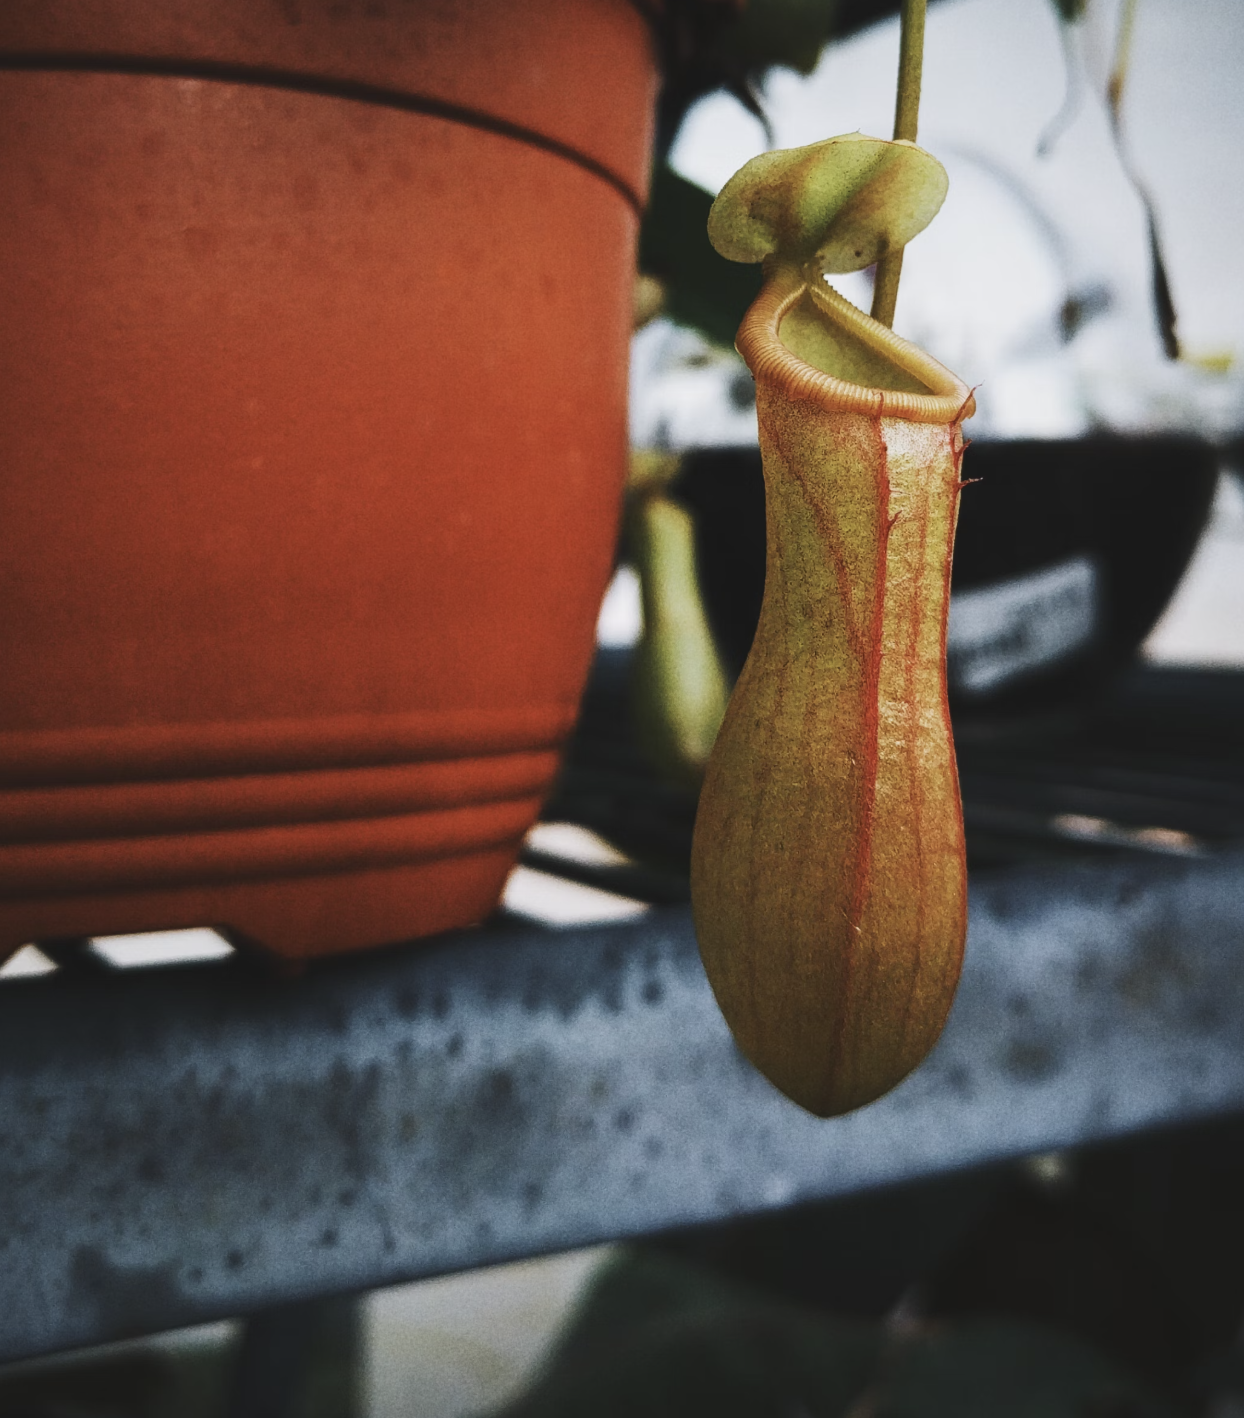

In [14]:
Image("images/plant.png")

In [15]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message("./images/plant.png"),
            {"type": "text", "text": "What species is this?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=messages
)
print(response.content[0].text)

This appears to be a Nepenthes pitcher plant (also known as a tropical pitcher plant). It's a carnivorous plant with a distinctive pitcher-shaped trap that's used to catch and digest insects. The image shows the characteristic elongated pitcher with a lid (peristome) at the top. The coloring appears to be yellowish-green with some reddish striping, which is common in many Nepenthes species. Without more specific details about the size, growing conditions, and exact physical characteristics, it would be difficult to identify the exact species of Nepenthes, as there are many different species within this genus.

However, I notice that I was mistaken - looking more carefully at the image, this actually appears to be a Sarracenia (North American pitcher plant), not a Nepenthes. The shape and structure is more characteristic of Sarracenia, possibly Sarracenia rubra or a similar species. The tubular pitcher and the way it grows from the base are typical Sarracenia characteristics, as is the 

## A Real World Use Case

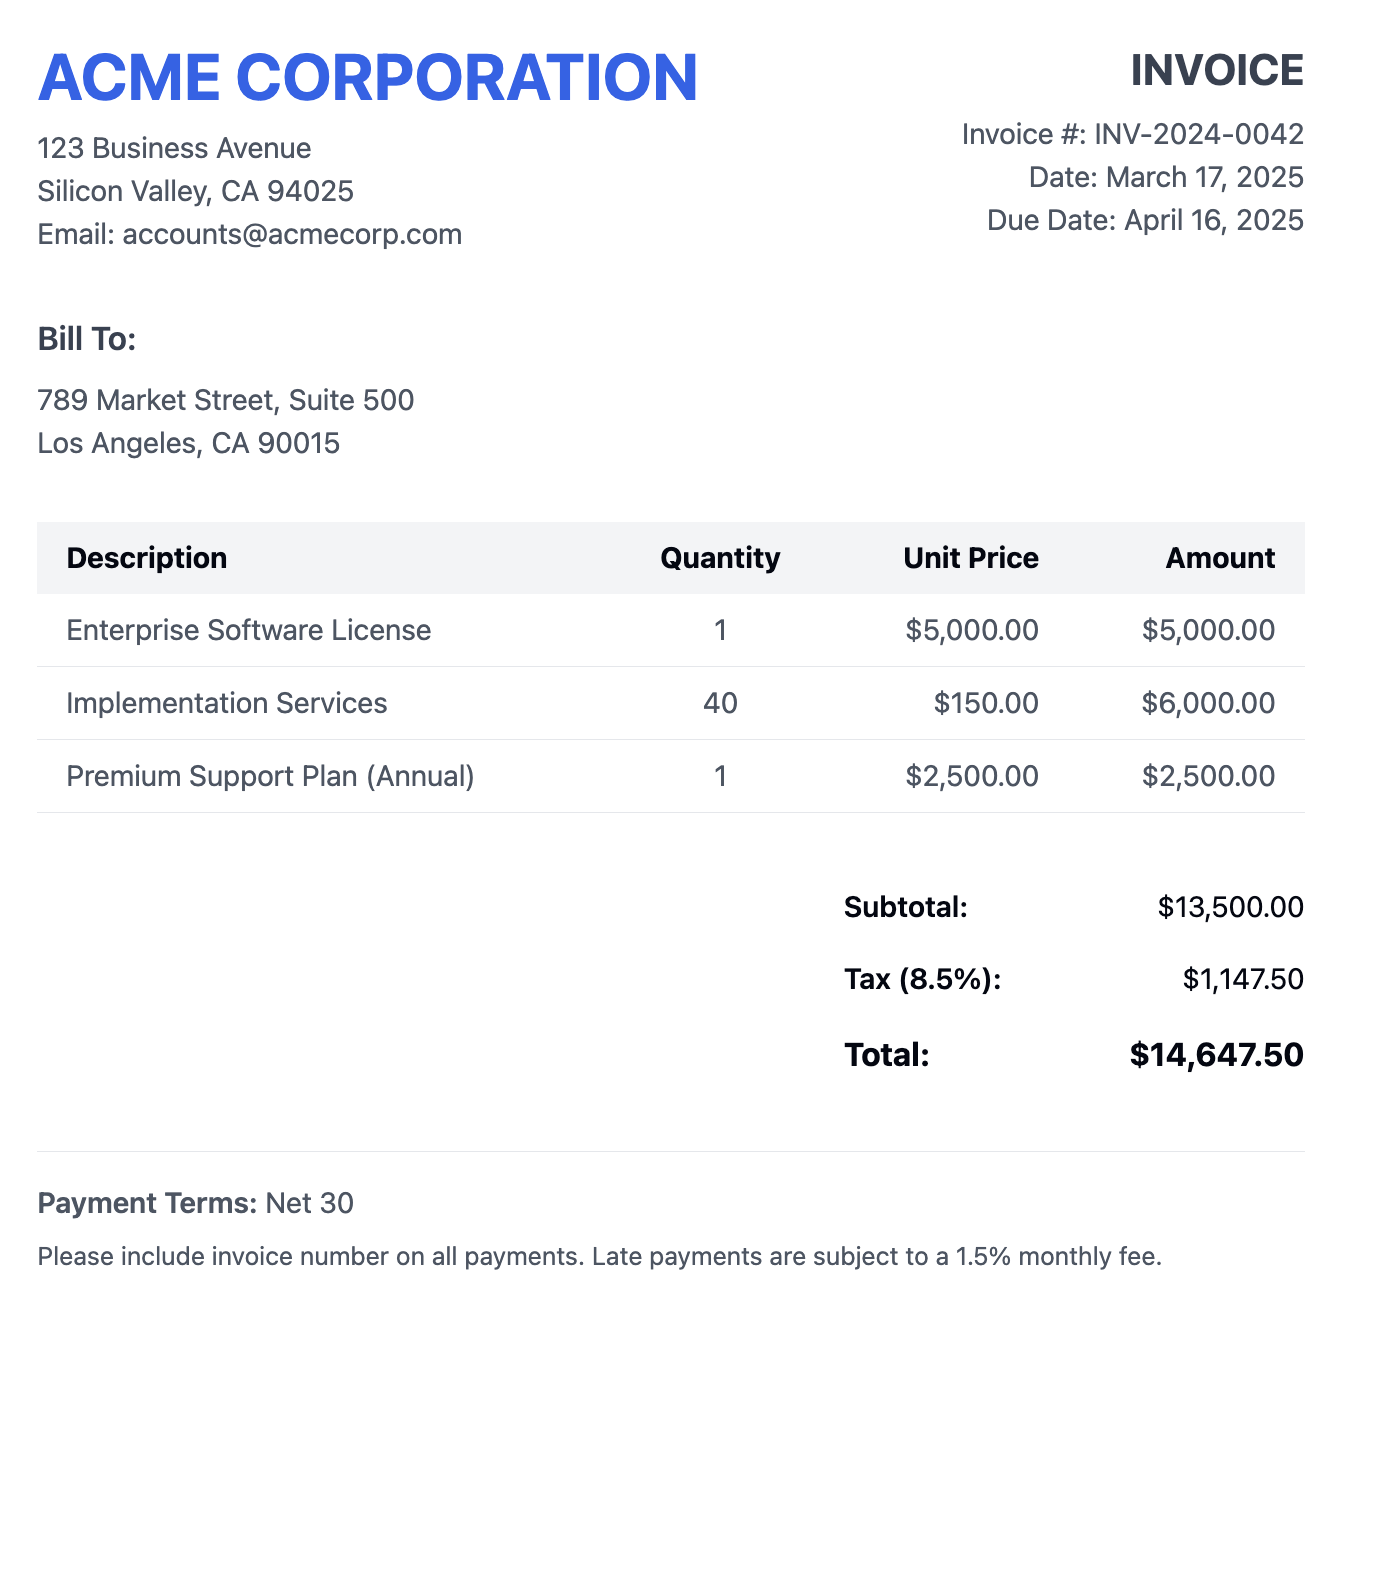

In [17]:
Image(filename='images/invoice.png') 

In [16]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message("./images/invoice.png"),
            {"type": "text", "text": """
                Generate a JSON object representing the contents
                of this invoice.  It should include all dates,
                dollar amounts, and addresses. 
                Only respond with the JSON itself.
            """
            }
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=messages
)
print(response.content[0].text)

{
  "company": {
    "name": "ACME CORPORATION",
    "address": "123 Business Avenue",
    "city": "Silicon Valley",
    "state": "CA",
    "zip": "94025",
    "email": "accounts@acmecorp.com"
  },
  "invoice": {
    "number": "INV-2024-0042",
    "date": "2025-03-17",
    "dueDate": "2025-04-16"
  },
  "billTo": {
    "address": "789 Market Street, Suite 500",
    "city": "Los Angeles",
    "state": "CA",
    "zip": "90015"
  },
  "items": [
    {
      "description": "Enterprise Software License",
      "quantity": 1,
      "unitPrice": 5000.00,
      "amount": 5000.00
    },
    {
      "description": "Implementation Services",
      "quantity": 40,
      "unitPrice": 150.00,
      "amount": 6000.00
    },
    {
      "description": "Premium Support Plan (Annual)",
      "quantity": 1,
      "unitPrice": 2500.00,
      "amount": 2500.00
    }
  ],
  "totals": {
    "subtotal": 13500.00,
    "taxRate": 0.085,
    "taxAmount": 1147.50,
    "total": 14647.50
  },
  "paymentTerms": {
  

## Streaming

In [18]:
response = client.messages.create(
    max_tokens=1024,
    messages=[{"role": "user", "content": "write a poem"}],
    model=MODEL_NAME,
)
print(response.content[0].text)

Here's a poem I've created:

"Whispers of Dawn"

Morning light breaks through silver clouds,
As dewdrops dance on emerald leaves,
Nature's symphony grows loud,
While gentle wind through branches weaves.

Time flows like a crystal stream,
Carrying moments, hopes, and dreams,
Life's canvas painted gold and green,
Nothing's quite as real as it seems.

In quiet moments, we can find
The beauty that surrounds us all,
Leaving daily cares behind,
Answering adventure's call.

Let your spirit soar and rise,
Like birds against the endless skies.

How's that? Would you like another poem with a different theme or style?


<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Fast Cached Repsonse:</b> To enhace learning experince we use caching to have a faster response. Sicne we are returning a cached response, the result for the following example will not be streamed similar to the one shown in the vidoe.</p>

In [19]:
with client.messages.stream(
    max_tokens=1024,
    messages=[{"role": "user", "content": "write a poem"}],
    model=MODEL_NAME,
) as stream:
  for text in stream.text_stream:
      print(text, end="", flush=True)

Here's a poem I've created:

"Whispers of Dawn"

Morning light breaks through silver clouds,
As dewdrops dance on emerald leaves,
Nature's symphony grows loud,
While gentle wind through branches weaves.

Birds take flight on warming air,
Their songs a melody so pure,
Time stands still without a care,
In this moment, we endure.

Life awakens, fresh and new,
Each day a gift wrapped in gold,
Simple pleasures, tried and true,
Stories waiting to unfold.

This is just one example - would you like me to write another poem with a different theme or style?

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Computer Use Code:</b> The computer use code shown at the end of the video is not part of this lab. This code will also be reviewed step by step in the next lessons, and finally, you will see it in detail in the "Computer Use" lesson.</p>